<a href="https://colab.research.google.com/github/EMKA-ctrl/2019-Equip3/blob/master/Entrega2GDSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
print(tf.__version__)

In [0]:
!pip uninstall tensorflow

Uninstalling tensorflow-1.15.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/freeze_graph
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.6/dist-packages/tensorflow-1.15.0.dist-info/*
    /usr/local/lib/python3.6/dist-packages/tensorflow/*
    /usr/local/lib/python3.6/dist-packages/tensorflow_core/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-1.15.0


In [0]:
!pip install tensorflow-gpu==2.0.0-alpha0 #Desinstalem tensorflow i instal·lem la nova versió a la
#gpu, així no tenim problemes amb la llibreria


     |████████████████████████████████| 332.1MB 46kB/s 
     |████████████████████████████████| 419kB 30.3MB/s 
     |████████████████████████████████| 3.0MB 31.2MB/s 


In [0]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
from os.path import isfile, join
from os import scandir, getcwd
import zipfile                         
from os import listdir
import sklearn.preprocessing as skl

In [24]:
!wget https://github.com/EMKA-ctrl/2019-Equip3/blob/master/TRAINYTEST.zip
with zipfile.ZipFile("./TRAINYTEST.zip", 'r') as zip_ref:
    zip_ref.extractall("./")

--2019-11-28 22:58:32--  https://github.com/EMKA-ctrl/2019-Equip3/blob/master/TRAINYTEST.zip
Resolving github.com (github.com)... 140.82.118.3
Connecting to github.com (github.com)|140.82.118.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘TRAINYTEST.zip.1’

TRAINYTEST.zip.1        [ <=>                ]  63.42K  --.-KB/s    in 0.009s  

2019-11-28 22:58:32 (6.84 MB/s) - ‘TRAINYTEST.zip.1’ saved [64946]



# New Section

In [0]:
listaTEST = [f for f in listdir("./TEST") if isfile(join("./TEST", f))]            # Fem una llista d'arxius i després llegim les imatges a una matriu 3D.
test = np.array([np.array(Image.open("./TEST/" + fname)) for fname in listaTEST])                        

listaTRAIN = [f for f in listdir("./TRAIN") if isfile(join("./TRAIN", f))]         # Repetim el procés per TRAIN.
train = np.array([np.array(Image.open("./TRAIN/" + fname)) for fname in listaTRAIN])                      

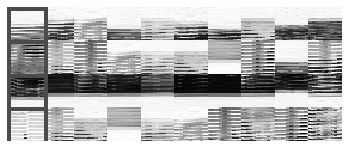

In [28]:
#Aquestes variables són el nombre d'imatges que contenen train i test respectivament, pero no s'utilitzen perquè les imatges no son en escala de grisos realment i tenen 3 components,
# per tant per que funcioni hem hagut de substituir-ho pel nombre de fotos*3.
Ntrain=len(train[:,1,1]) 
Ntest=len(test[:,1,1])    

# Creem una versió de les matrius que tingui dues dimensions en una línia (28x28=784) y seguidament les normalitzem
mtrain = np.reshape(train, (84,784))
mtest = np.reshape(test, (12,784))

mtrain = skl.normalize(mtrain)     
mtest = skl.normalize(mtest)

# Calculem la trasposada per les similituds
mtrain = mtrain.transpose()

sims = np.matmul(mtest, mtrain)

ranks = np.argsort(sims, axis=1)[:,::-1]


# Visualització de les imatges
x_train_images = np.reshape(train, (84, 28, 28))
x_test_images = np.reshape(test, (12, 28, 28))

h,w = (28, 28)
new_image= Image.new('RGB', (h*10,w*4))

# Visualize ranks of the 10 queries
offset = 0 # it will show results from query #'offset' to #offset+10    900
for q in range(4):                                                      # 10
  ranks_q = ranks[q*(offset+1),:]
  for i in range(10):                                                   #15
      new_image.paste( Image.fromarray(x_train_images[ranks_q[i]]), (h*(1+i),w*q ))

  # visualize query
  ima_q = Image.fromarray(x_test_images[q*(offset+1),...])
  ima_q = ImageOps.expand(ima_q, border=3, fill='green')

  new_image.paste(ima_q, (0,w*q))

plt.figure()
plt.imshow(new_image)
plt.axis('off')
plt.show()